<a href="https://colab.research.google.com/github/YooJung-Moon/K-melon/blob/main/VGG16_basic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import applications
from keras.utils import load_img, img_to_array, array_to_img
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import os

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content"
# %cd "/content/drive/MyDrive"
!mkdir img

/content


In [ ]:
# !unzip '/content/drive/MyDrive/deeplearning/img3.zip' -d '/content/img'
!unzip '/content/drive/MyDrive/deeplearning/img4.zip' -d '/content/img'

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/img/val/정상/S009-FM01-009-2022-06-28-000080.jpg  
  inflating: /content/img/val/정상/S009-FM01-009-2022-06-28-000085.jpg  
  inflating: /content/img/val/정상/S009-FM01-009-2022-06-28-000086.jpg  
  inflating: /content/img/val/정상/S009-FM01-009-2022-06-28-000088.jpg  
  inflating: /content/img/val/정상/S009-FM01-009-2022-06-28-000094.jpg  
  inflating: /content/img/val/정상/S009-FM01-009-2022-06-28-000096.jpg  
  inflating: /content/img/val/정상/S009-FM01-009-2022-06-28-000101.jpg  
  inflating: /content/img/val/정상/S009-FM01-009-2022-06-28-000110.jpg  
  inflating: /content/img/val/정상/S009-FM01-009-2022-06-29-000001.jpg  
  inflating: /content/img/val/정상/S009-FM01-009-2022-06-29-000004.jpg  
  inflating: /content/img/val/정상/S009-FM01-009-2022-06-29-000005.jpg  
  inflating: /content/img/val/정상/S009-FM01-009-2022-06-29-000010.jpg  
  inflating: /content/img/val/정상/S009-FM01-009-2022-06-29-000014.jpg  
  inflating: /content/img/val/정상/S009-FM0

In [ ]:
epochs = 20
batch_size = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [ ]:
img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_set = img_gen.flow_from_directory(directory="/content/img/train",
                                        target_size = (IMG_WIDTH,IMG_HEIGHT),
                                        class_mode='categorical',
                                        batch_size = batch_size)
val_set = img_gen.flow_from_directory(directory="/content/img/val",
                                        target_size = (IMG_WIDTH,IMG_HEIGHT),
                                        class_mode='categorical',
                                        batch_size = batch_size)
test_set = img_gen.flow_from_directory(directory="/content/img/test",
                                        target_size = (IMG_WIDTH,IMG_HEIGHT),
                                        class_mode='categorical',
                                        batch_size = batch_size)

Found 32855 images belonging to 5 classes.
Found 8268 images belonging to 5 classes.
Found 1670 images belonging to 5 classes.


In [ ]:
train_set.class_indices

{'노균병': 0, '노균병유사': 1, '정상': 2, '흰가루병': 3, '흰가루병유사': 4}

In [ ]:
model = applications.vgg16.VGG16(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=5
)

In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_set, epochs=epochs, batch_size = batch_size,validation_data=val_set)

Epoch 1/20
1027/1027 [==============================] - 445s 429ms/step - loss: 0.1597 - accuracy: 0.2366 - val_loss: 0.1596 - val_accuracy: 0.2419
Epoch 2/20
1027/1027 [==============================] - 430s 418ms/step - loss: 0.1597 - accuracy: 0.2370 - val_loss: 0.1595 - val_accuracy: 0.2419
Epoch 3/20
1027/1027 [==============================] - 430s 419ms/step - loss: 0.1596 - accuracy: 0.2370 - val_loss: 0.1595 - val_accuracy: 0.2419
Epoch 4/20
1027/1027 [==============================] - 430s 418ms/step - loss: 0.1596 - accuracy: 0.2370 - val_loss: 0.1595 - val_accuracy: 0.2419
Epoch 5/20
1027/1027 [==============================] - 430s 418ms/step - loss: 0.1596 - accuracy: 0.2370 - val_loss: 0.1595 - val_accuracy: 0.2419
Epoch 6/20
1027/1027 [==============================] - 430s 418ms/step - loss: 0.1596 - accuracy: 0.2370 - val_loss: 0.1595 - val_accuracy: 0.2419
Epoch 7/20
1027/1027 [==============================] - 430s 419ms/step - loss: 0.1596 - accuracy: 0.2370 - val_

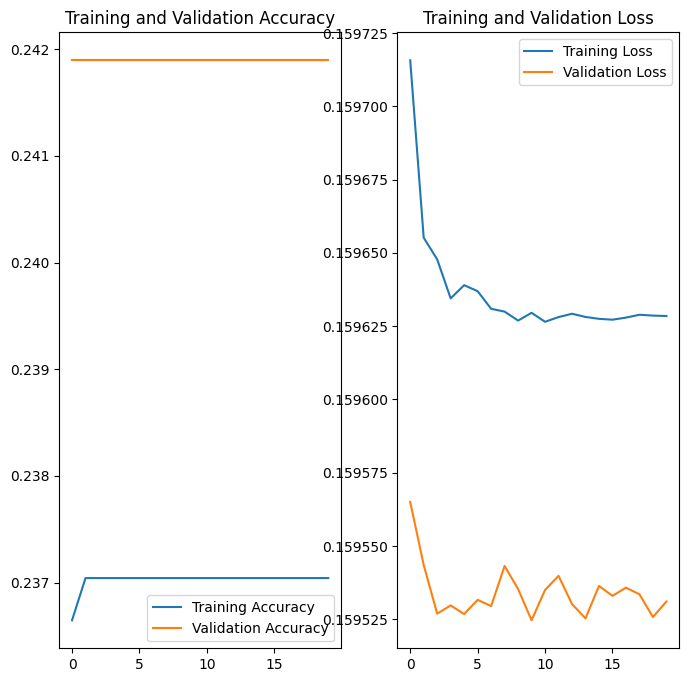

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)

plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')

plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')

plt.title('Training and Validation Loss')
plt.show()

In [ ]:
%cd "/content/drive/MyDrive/deeplearning"
model.save("기본전체_ResNet50.h5")

/content/drive/MyDrive/deeplearning


In [ ]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/deeplearning/기본전체_ResNet50.h5')

In [ ]:
model.evaluate(test_set)

53/53 [==============================] - 8s 141ms/step - loss: 0.1589 - accuracy: 0.2389


[0.15885277092456818, 0.2389221489429474]

In [ ]:
images = []
labels = []

def load_image():
  global images, labels
  dir = "/content/img/test/"
  class_dir = ['노균병','노균병유사','정상','흰가루병','흰가루병유사']
  for index in range(len(class_dir)):
    list_dir = dir+class_dir[index]+"/"
    for j in os.listdir(list_dir):
      if j == ".ipynb_checkpoints":
        continue
      img = load_img(list_dir+j)
      test_array = img_to_array(img)
      # test_x = test_array / 255.0
      test_x = tf.expand_dims(img,0)
      # img = array_to_img(test_x)
      # plt.imshow(img)
      # plt.show()
      # break
      images.append(test_x)
      labels.append(index)
    # load_imgs = image.load_img(images)

load_image()
labels = np.array(labels)
# print(labels)
# labels = labels.reshape(-1,1)
# on_encoder = OneHotEncoder()
# on_encoder.fit(labels)
# one_label = on_encoder.transform(labels)

In [ ]:
labels[0]

0

In [ ]:
y = []
for i in range(len(images)):
  predictions = model.predict(images[i]/255)
  pred = np.argmax(predictions)
  y.append(pred)
class_names = list(test_set.class_indices.keys())
cf_matrix = metrics.confusion_matrix(y, labels)
print(cf_matrix)
print('Classification Report:')
print(classification_report(y, labels, target_names=class_names))

1/1 [==============================] - 0s 19ms/step
[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [399 399 399 399  74]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]
Classification Report:
              precision    recall  f1-score   support

         노균병       0.00      0.00      0.00         0
       노균병유사       0.00      0.00      0.00         0
          정상       1.00      0.24      0.39      1670
        흰가루병       0.00      0.00      0.00         0
      흰가루병유사       0.00      0.00      0.00         0

    accuracy                           0.24      1670
   macro avg       0.20      0.05      0.08      1670
weighted avg       1.00      0.24      0.39      1670



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn  import metrics
cf = metrics.confusion_matrix(y, labels) #test_set
print(cf)

[[  0   0   0   0   0]
 [  0   0   0   0   0]
 [399 399 399 399  74]
 [  0   0   0   0   0]
 [  0   0   0   0   0]]
